
# Module 3 — Convolutional Neural Networks (CIFAR‑10)

This notebook follows the **Module 3** assignment flow:
- Load **CIFAR‑10**
- Build a compact **CNN** (≤ ~500k parameters) and train ≤ 50 epochs
- Report test accuracy and plot training curves
- **Transfer learning** with **VGG16** (frozen base) for a quick win


In [1]:

import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

np.random.seed(144)

# 1) Data
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
y_train = y_train.squeeze()
y_test  = y_test.squeeze()
x_train = (x_train / 255.0).astype("float32")
x_test  = (x_test  / 255.0).astype("float32")

print("Train:", x_train.shape, y_train.shape)
print("Test: ", x_test.shape,  y_test.shape)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 9s 0us/step
Train: (50000, 32, 32, 3) (50000,)
Test:  (10000, 32, 32, 3) (10000,)


## 2) Compact CNN (from scratch)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,050 (433.79 KB)

 Trainable params: 111,050 (433.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
352/352 - 12s - 34ms/step - accuracy: 0.2698 - loss: 1.9154 - val_accuracy: 0.3806 - val_loss: 1.6671
Epoch 2/30
352/352 - 11s - 30ms/step - accuracy: 0.3940 - loss: 1.6105 - val_accuracy: 0.4486 - val_loss: 1.4861
Epoch 3/30
352/352 - 11s - 32ms/step - accuracy: 0.4542 - loss: 1.4830 - val_accuracy: 0.4888 - val_loss: 1.3799
Epoch 4/30
352/352 - 11s - 30ms/step - accuracy: 0.4922 - loss: 1.3803 - val_accuracy: 0.5260 - val_loss: 1.2811
Epoch 5/30
352/352 - 11s - 31ms/step - accuracy: 0.5211 - loss: 1.3064 - val_accuracy: 0.5570 - val_loss: 1.1999
Epoch 6/30
352/352 - 11s - 32ms/step - accuracy: 0.5480 - loss: 1.2343 - val_accuracy: 0.5644 - val_loss: 1.2041
Epoch 7/30
352/352 - 12s - 35ms/step - accuracy: 0.5652 - loss: 1.1949 - val_accuracy: 0.5890 - val_loss: 1.1194
Epoch 8/30
352/352 - 12s - 33ms/step - accuracy: 0.5855 - loss: 1.1406 - val_accuracy: 0.6034 - val_loss: 1.0858
Epoch 9/30
352/352 - 12s - 35ms/step - accuracy: 0.6029 - loss: 1.1012 - val_accuracy: 0.6322 - 

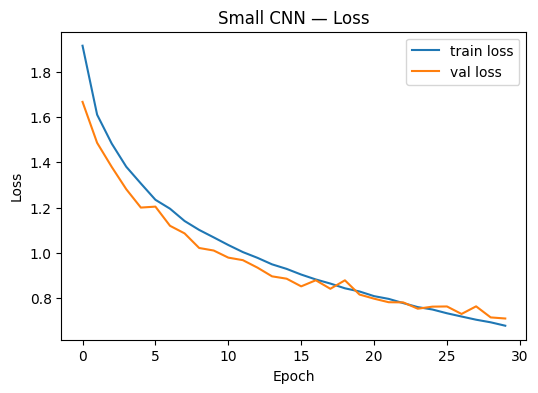

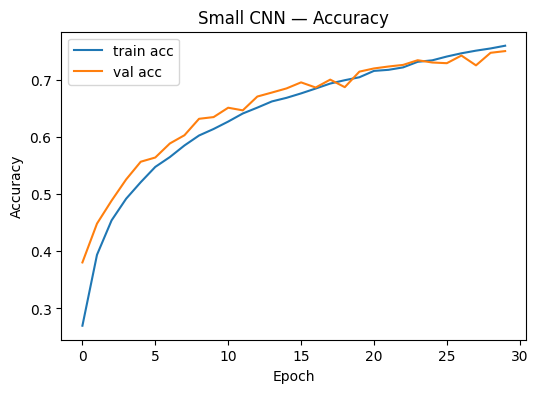

In [2]:

def build_small_cnn():
    model = keras.Sequential([
        layers.Input(shape=(32,32,3)),
        layers.Conv2D(32, 3, padding="same", activation="relu"),
        layers.MaxPooling2D(),
        layers.Conv2D(64, 3, padding="same", activation="relu"),
        layers.MaxPooling2D(),
        layers.Conv2D(128, 3, padding="same", activation="relu"),
        layers.GlobalAveragePooling2D(),
        layers.Dense(128, activation="relu"),
        layers.Dropout(0.3),
        layers.Dense(10, activation="softmax"),
    ])
    return model

cnn = build_small_cnn()
cnn.summary()

cnn.compile(optimizer=keras.optimizers.Adam(1e-3),
            loss="sparse_categorical_crossentropy",
            metrics=["accuracy"])

callbacks = [
    keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True, monitor="val_accuracy")
]

hist = cnn.fit(x_train, y_train, validation_split=0.1,
               epochs=30, batch_size=128, verbose=2, callbacks=callbacks)

test_loss, test_acc = cnn.evaluate(x_test, y_test, verbose=0)
print("Small CNN — test accuracy:", round(float(test_acc), 4))

# Curves
plt.figure(figsize=(6,4))
plt.plot(hist.history["loss"], label="train loss")
plt.plot(hist.history["val_loss"], label="val loss")
plt.xlabel("Epoch"); plt.ylabel("Loss"); plt.title("Small CNN — Loss"); plt.legend(); plt.show()

plt.figure(figsize=(6,4))
plt.plot(hist.history["accuracy"], label="train acc")
plt.plot(hist.history["val_accuracy"], label="val acc")
plt.xlabel("Epoch"); plt.ylabel("Accuracy"); plt.title("Small CNN — Accuracy"); plt.legend(); plt.show()


## 3) Transfer Learning with VGG16 (frozen base)

In [ ]:

from tensorflow.keras.applications import VGG16

# Resize images to 64x64 for VGG16 (lighter than 224x224)
def resize_batch(x, new_size=(64,64)):
    return np.stack([keras.preprocessing.image.smart_resize(img, new_size) for img in x], axis=0)

x_train_64 = resize_batch(x_train, (64,64))
x_test_64  = resize_batch(x_test, (64,64))

base = VGG16(include_top=False, weights="imagenet", input_shape=(64,64,3))
base.trainable = False

tl = keras.Sequential([
    base,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(10, activation="softmax")
])

tl.compile(optimizer=keras.optimizers.Adam(1e-3),
           loss="sparse_categorical_crossentropy",
           metrics=["accuracy"])

hist_tl = tl.fit(x_train_64, y_train, validation_split=0.1,
                 epochs=10, batch_size=128, verbose=2)

test_loss_tl, test_acc_tl = tl.evaluate(x_test_64, y_test, verbose=0)
print("VGG16 transfer — test accuracy:", round(float(test_acc_tl), 4))

plt.figure(figsize=(6,4))
plt.plot(hist_tl.history["loss"], label="train loss")
plt.plot(hist_tl.history["val_loss"], label="val loss")
plt.xlabel("Epoch"); plt.ylabel("Loss"); plt.title("VGG16 Transfer — Loss"); plt.legend(); plt.show()

plt.figure(figsize=(6,4))
plt.plot(hist_tl.history["accuracy"], label="train acc")
plt.plot(hist_tl.history["val_accuracy"], label="val acc")
plt.xlabel("Epoch"); plt.ylabel("Accuracy"); plt.title("VGG16 Transfer — Accuracy"); plt.legend(); plt.show()


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/10
352/352 - 255s - 723ms/step - accuracy: 0.4525 - loss: 1.5737 - val_accuracy: 0.5774 - val_loss: 1.2379
Epoch 2/10
352/352 - 284s - 807ms/step - accuracy: 0.5719 - loss: 1.2352 - val_accuracy: 0.6150 - val_loss: 1.1232
Epoch 3/10
352/352 - 271s - 770ms/step - accuracy: 0.5990 - loss: 1.1568 - val_accuracy: 0.6316 - val_loss: 1.0742
Epoch 4/10
352/352 - 271s - 769ms/step - accuracy: 0.6136 - loss: 1.1109 - val_accuracy: 0.6406 - val_loss: 1.0527
Epoch 5/10
352/352 - 241s - 686ms/step - accuracy: 0.6246 - loss: 1.0763 - val_accuracy: 0.6422 - val_loss: 1.0295
Epoch 6/10
352/352 - 233s - 663ms/step - accuracy: 0.6336 - loss: 1.0544 - val_accuracy: 0.6504 - val_loss: 1.0144
Epoch 7/10
